## Introduction

This project is going to predict the future close price of Apple stock using the past data of the New York stock exchange data and putting it into machine learing.


> We will be using the recurrent neural network Long short term memory(LSTM) to predict the closing stock price of a corporation using the past data.

In [ ]:
import numpy as np
import math, time
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.metrics import accuracy_score

## Analyze data

In [ ]:
#Getting data from the yahoo
df= web.DataReader('AAPL',data_source='yahoo', start='2013-01-01', end='2019-12-12')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,68.502106
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,67.637436
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,65.753418
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,65.366646
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,65.542587


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-06,271.000000,267.299988,267.480011,270.709991,26518900.0,269.339935
2019-12-09,270.799988,264.910004,270.000000,266.920013,32010600.0,265.569122
2019-12-10,270.070007,265.859985,268.600006,268.480011,22605100.0,267.121246
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151


In [ ]:
# Getting the numbers of rows and col in the data set
df.shape

(1750, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1750 entries, 2013-01-02 to 2019-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1750 non-null   float64
 1   Low        1750 non-null   float64
 2   Open       1750 non-null   float64
 3   Close      1750 non-null   float64
 4   Volume     1750 non-null   float64
 5   Adj Close  1750 non-null   float64
dtypes: float64(6)
memory usage: 95.7 KB


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1750.000000,1750.000000,1750.000000,1750.000000,1.750000e+03,1750.000000
mean,133.229967,130.915944,132.065029,132.108171,4.931863e+07,125.604127
std,49.977298,49.156526,49.543531,49.615975,3.439209e+07,51.267246
min,57.085712,55.014286,55.424286,55.790001,1.136200e+07,49.010136
25%,96.842497,95.029999,95.955002,96.002499,2.634675e+07,88.942093
50%,119.525002,117.779999,118.625000,118.959999,3.833890e+07,110.948639
75%,172.664993,169.707504,171.187500,171.095005,6.104192e+07,166.346466
max,272.559998,268.500000,270.000000,271.459991,3.652131e+08,270.086151


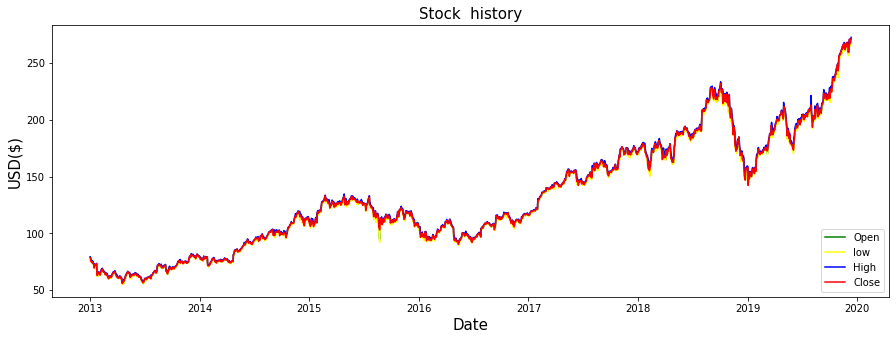

In [ ]:
#Visulaizing the stock history
plt.figure(figsize=(15,5))
plt.title('Stock  history',fontsize=15)
plt.plot(df['Open'],color='green', label='Open')
plt.plot(df['Low'],color='yellow', label='low')
plt.plot(df['High'],color='blue', label='High')
plt.plot(df['Close'], color='red', label='Close')
plt.xlabel("Date", fontsize=15)
plt.ylabel("USD($)", fontsize=15)
plt.legend(loc='lower right')
plt.show()

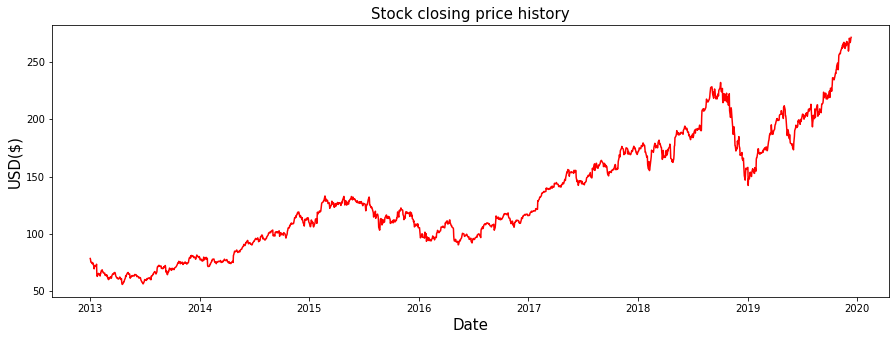

In [ ]:
# Visualize the closing price  history
plt.figure(figsize=(15,5))
plt.title('Stock closing price history',fontsize=15)
plt.plot(df['Close'], color='red', label='Close')
plt.xlabel("Date", fontsize=15)
plt.ylabel("USD($)", fontsize=15)
plt.show()

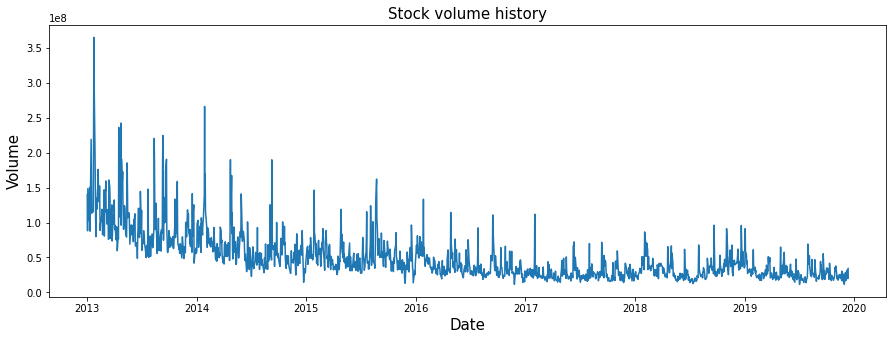

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Stock volume history',fontsize=15)
plt.plot(df['Volume'])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Volume", fontsize=15)
plt.show()

## Maniplate the data


1.   Scale the data
2.   Create a train and test dataset



In [ ]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
dataset = data.values # into numpy array
training_data_len = math.ceil(len(dataset) * .8) # 80% of the rows of the data to be trained
training_data_len

1400

In [ ]:
# Scaling the data 
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scaler.fit_transform(dataset)
scaled_data

array([[0.10498843],
       [0.10039809],
       [0.09039604],
       ...,
       [0.98618268],
       [0.99680066],
       [1.        ]])

In [ ]:
# create the train data set 
# create the scaled training data set 
train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = [] 
for i in range(60,len(train_data)): 
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
# convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)
# reshape the data to fit in our model
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Create a testing data
test_data = scaled_data[training_data_len-60:, :]
# create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)): 
  x_test.append(test_data[i-60:i,0])
x_test= np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1340, 60, 1)
y_train.shape =  (1340,)
x_test.shape =  (350, 60, 1)
y_test.shape =  (350, 1)


# Bulid a model

1.   LSTM model 
2.   GRU model



In [ ]:
# Build the LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
LSTM_model.add(LSTM(50, return_sequences=False))
LSTM_model.add(Dense(25))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
LSTM_model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1340/1340 [==============================] - 48s 36ms/step - loss: 0.0012


In [ ]:
# Get the model predicted price values
predictions = LSTM_model.predict(x_test)
predictions = min_max_scaler.inverse_transform(predictions) # unscaling and hoping to contain the same values as our y_test dataset

In [ ]:
# Get the root mean squared error(RMSE) of the LSTM
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.925012948172433

In [ ]:
# Build the GRU model
GRU_model = Sequential()
GRU_model.add(GRU(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
GRU_model.add(GRU(50, return_sequences=False))
GRU_model.add(Dense(25))
GRU_model.add(Dense(1))
GRU_model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
GRU_model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1340/1340 [==============================] - 76s 57ms/step - loss: 5.6855e-04


In [ ]:
# Get the model predicted price values of the GRU model
predictions1 = GRU_model.predict(x_test)
predictions1 = min_max_scaler.inverse_transform(predictions1)

In [ ]:
# Get the root mean squared error(RMSE) of the GRU model
rmse1 = np.sqrt(np.mean(predictions1 - y_test)**2)
rmse1

4.697203238351005

# Prediction with the LSTM model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


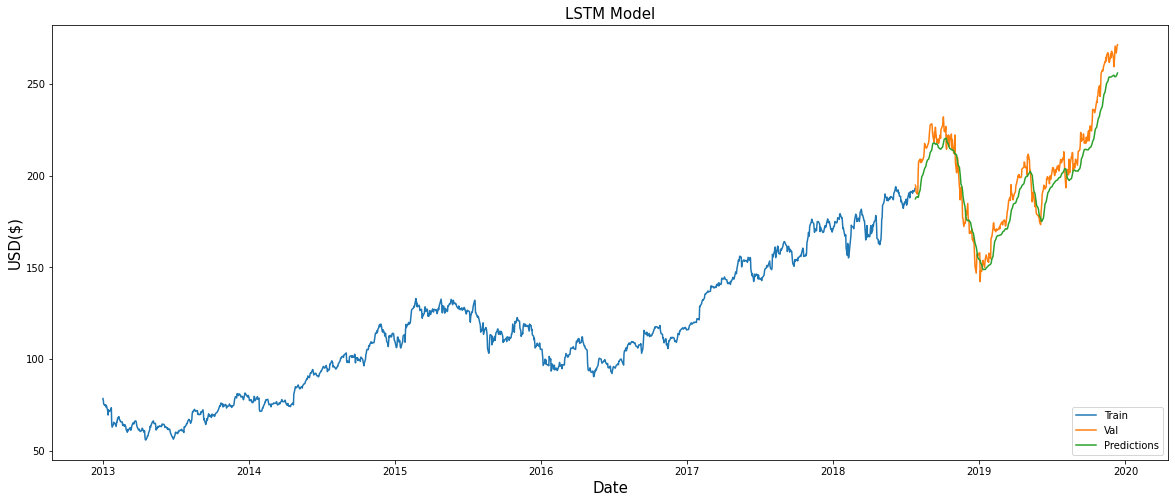

In [ ]:
#Visulazing the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('LSTM Model',fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.xlabel("Date", fontsize=15)
plt.ylabel("USD($)", fontsize=15)
plt.show()

In [ ]:
# Show the vaild and predicted prices
valid

,Close,Predictions
Date,,
2018-07-25,194.820007,187.360336
2018-07-26,194.210007,187.817673
2018-07-27,190.979996,188.279770
2018-07-30,189.910004,188.447861
2018-07-31,190.289993,188.344650
...,...,...
2019-12-06,270.709991,253.929306
2019-12-09,266.920013,254.366608
2019-12-10,268.480011,254.796982


In [ ]:
# Get the quote
stock_quote =  web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-1-12')
# new dataframe
new_df=stock_quote.filter(['Close'])
# get the last 60 days closing price
last_60=new_df[-60:].values
last_60_scaled = min_max_scaler.transform(last_60)
X_test = []
# Append the past 60 days
X_test.append(last_60_scaled)
X_test=np.array(X_test)
# reshape the data
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price = LSTM_model.predict(X_test)
pred_price = min_max_scaler.inverse_transform(pred_price)
print("Models best next day stock closing price number($): ",pred_price)

Models best next day stock closing price number($):  [[284.7045]]


In [ ]:
next_day_price =  web.DataReader('AAPL', data_source='yahoo', start='2020-1-13', end='2020-1-13')
next_day_price['Close']

Date
2020-01-13    316.959991
Name: Close, dtype: float64

# Prediction with the GRU model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


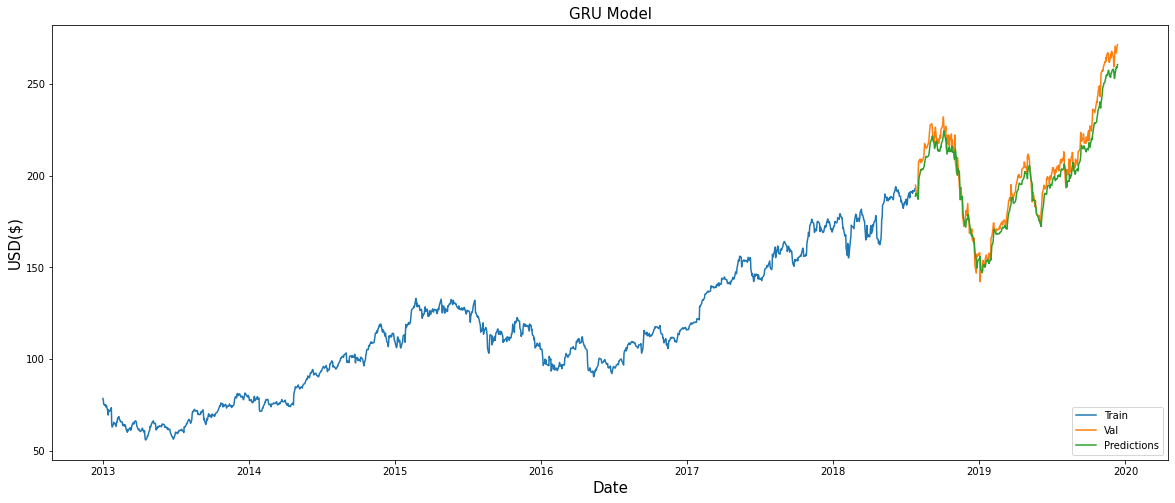

In [ ]:
train1 = data[:training_data_len]
valid1 = data[training_data_len:]
valid1['Predictions'] = predictions1
plt.figure(figsize=(20,8))
plt.title('GRU Model',fontsize=15)
plt.plot(train1['Close'])
plt.plot(valid1[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.xlabel("Date", fontsize=15)
plt.ylabel("USD($)", fontsize=15)
plt.show()

In [ ]:
# Show the vaild and predicted prices
valid1

,Close,Predictions
Date,,
2018-07-25,194.820007,188.796432
2018-07-26,194.210007,190.093643
2018-07-27,190.979996,190.442154
2018-07-30,189.910004,188.934875
2018-07-31,190.289993,187.564011
...,...,...
2019-12-06,270.709991,255.356247
2019-12-09,266.920013,259.223846
2019-12-10,268.480011,258.660431


In [ ]:
# Get the quote
stock_quote1 =  web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-1-12')
# new dataframe
new_df1=stock_quote.filter(['Close'])
# get the last 60 days closing price
last_601=new_df1[-60:].values
last_60_scaled1 = min_max_scaler.transform(last_601)
X_test = []
# Append the past 60 days
X_test.append(last_60_scaled1)
X_test=np.array(X_test)
# reshape the data
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price1= GRU_model.predict(X_test)
pred_price1 = min_max_scaler.inverse_transform(pred_price1)
print("Models best next day stock closing price number($): ",pred_price1)

Models best next day stock closing price number($):  [[296.4726]]


In [ ]:
next_day_price =  web.DataReader('AAPL', data_source='yahoo', start='2020-1-13', end='2020-1-13')
next_day_price['Close']

Date
2020-01-13    316.959991
Name: Close, dtype: float64